<a href="https://colab.research.google.com/github/AbenezerYBekele/data-analyst/blob/main/Medicaid_Coverage_Analysis_(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
df = pd.read_csv('Medicaid_coverage_2025.csv')
df.head()

,TOPIC,SUBTOPIC,SUBTOPIC_ID,CLASSIFICATION,CLASSIFICATION_ID,GROUP,GROUP_ID,GROUP_ORDER,SUBGROUP,SUBGROUP_ID,SUBGROUP_ORDER,ESTIMATE_TYPE,ESTIMATE_TYPE_ID,TIME_PERIOD,TIME_PERIOD_ID,ESTIMATE,STANDARD_ERROR,ESTIMATE_UCI,ESTIMATE_LCI,FLAG,FOOTNOTE_ID_LIST
0,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1984,1,6.8,0.3,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
1,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1989,2,7.2,0.2,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
2,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1994,3,11.2,0.3,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
3,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1995,4,11.5,0.3,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"
4,Medicaid coverage among people younger than 65...,NaN,NaN,Total,0,Total,0,0,Younger than 65 years,0.1,0,"Percent of population, crude",1,1997,5,9.7,0.2,NaN,NaN,NaN,"FN0183,NT0018,SC0005,NT0079"


Explore the Data

In [104]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.rename(columns={'State Code': 'State', 'Coverage %': 'Coverage_Percentage'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TOPIC              1944 non-null   object        
 1   SUBTOPIC           0 non-null      float64       
 2   SUBTOPIC_ID        0 non-null      float64       
 3   CLASSIFICATION     1944 non-null   object        
 4   CLASSIFICATION_ID  1944 non-null   int64         
 5   GROUP              1944 non-null   object        
 6   GROUP_ID           1944 non-null   int64         
 7   GROUP_ORDER        1944 non-null   int64         
 8   SUBGROUP           1944 non-null   object        
 9   SUBGROUP_ID        1944 non-null   float64       
 10  SUBGROUP_ORDER     1944 non-null   int64         
 11  ESTIMATE_TYPE      1944 non-null   object        
 12  ESTIMATE_TYPE_ID   1944 non-null   int64         
 13  TIME_PERIOD        1944 non-null   datetime64[ns]
 14  TIME_PER

Check Unique Values in Key Columns

In [72]:
print("TOPIC:", df['TOPIC'].unique())
print("SUBTOPIC:", df['SUBTOPIC'].unique())
print("TIME_PERIOD:", df['TIME_PERIOD'].unique())
print("CLASSIFICATION:", df['CLASSIFICATION'].unique())
print("SUBGROUP:", df['SUBGROUP'].unique())

TOPIC: ['Medicaid coverage among people younger than 65 years']
SUBTOPIC: [nan]
TIME_PERIOD: [1984 1989 1994 1995 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
CLASSIFICATION: ['Total' 'Demographic Characteristic' 'Geographic Characteristic'
 'Multiple Characteristics']
SUBGROUP: ['Younger than 65 years' 'Younger than 18 years' 'Younger than 6 years'
 '6-17 years' '18-64 years' '18-44 years' '18-24 years' '25-34 years'
 '35-44 years' '45-64 years' '45-54 years' '55-64 years'
 'Younger than 19 years' '6-18 years' '19-25 years' 'No difficulty'
 'Some difficulty' 'A lot of difficulty or cannot do at all'
 'American Indian and Alaska Native only' 'Asian only'
 'Asian or Pacific Islander only' 'Black only'
 'Native Hawaiian or Other Pacific Islander only' 'White only'
 'Two or more races' 'All races, Hispanic' 'All races, Hispanic, Cuban'
 'All races, Hispanic, Mexican' 'All races, Hispanic, Puerto Rican'
 'All races, Hi

Filter and Pivot the Data

In [101]:
filtered_df = df[['TIME_PERIOD', 'CLASSIFICATION', 'ESTIMATE']]

filtered_df = filtered_df.dropna(subset=['ESTIMATE'])

pivot_df = filtered_df.pivot_table(index='TIME_PERIOD', columns='CLASSIFICATION', values='ESTIMATE', aggfunc='mean')

pivot_df.head()


CLASSIFICATION,Demographic Characteristic,Geographic Characteristic,Multiple Characteristics,Total
TIME_PERIOD,,,,
1970-01-01 00:00:00.000001984,9.860714,6.883333,9.450000,10.40
1970-01-01 00:00:00.000001989,10.217857,7.350000,10.590000,11.30
1970-01-01 00:00:00.000001994,14.678571,11.200000,15.380000,18.45
1970-01-01 00:00:00.000001995,14.885714,11.666667,17.917857,19.05
1970-01-01 00:00:00.000001997,12.535714,9.983333,15.096667,16.30


Plot the Trends

<Figure size 1200x600 with 0 Axes>

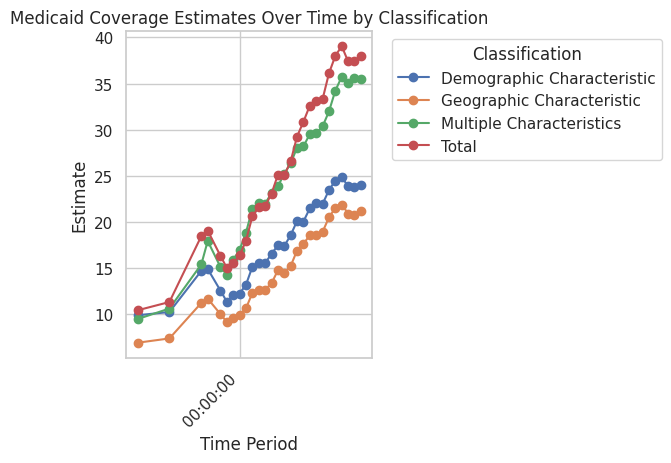

In [102]:
plt.figure(figsize=(12, 6))
pivot_df.plot(marker='o')
plt.title('Medicaid Coverage Estimates Over Time by Classification')
plt.ylabel('Estimate')
plt.xlabel('Time Period')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top N Classifications by Average Estimate

<ipython-input-63-c91c0722da2a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_class.values, y=top_class.index, palette='Blues_d')


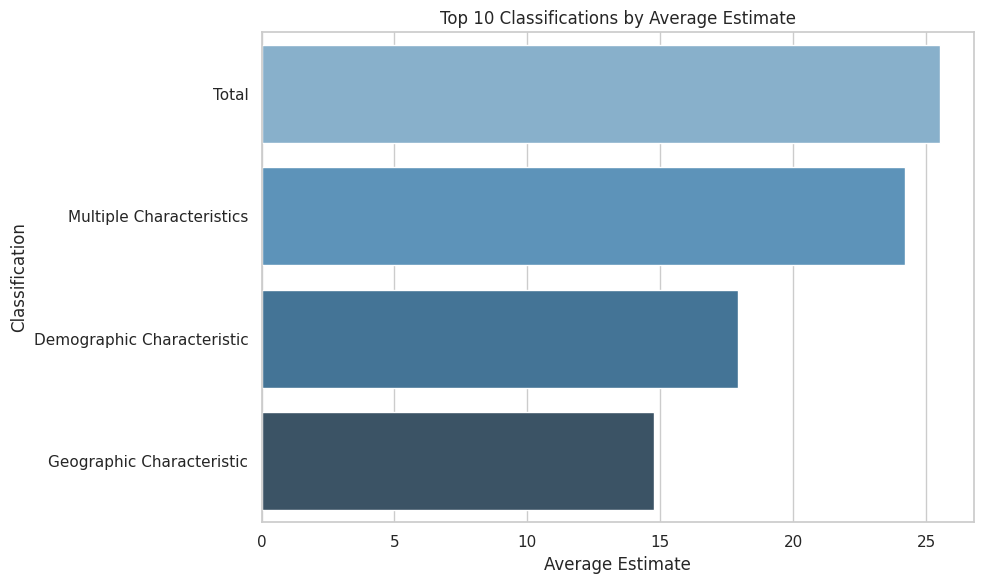

In [63]:
top_class = df.groupby('CLASSIFICATION')['ESTIMATE'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_class.values, y=top_class.index, palette='Blues_d')
plt.title('Top 10 Classifications by Average Estimate')
plt.xlabel('Average Estimate')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

Trend Over Time

Classification vs Time

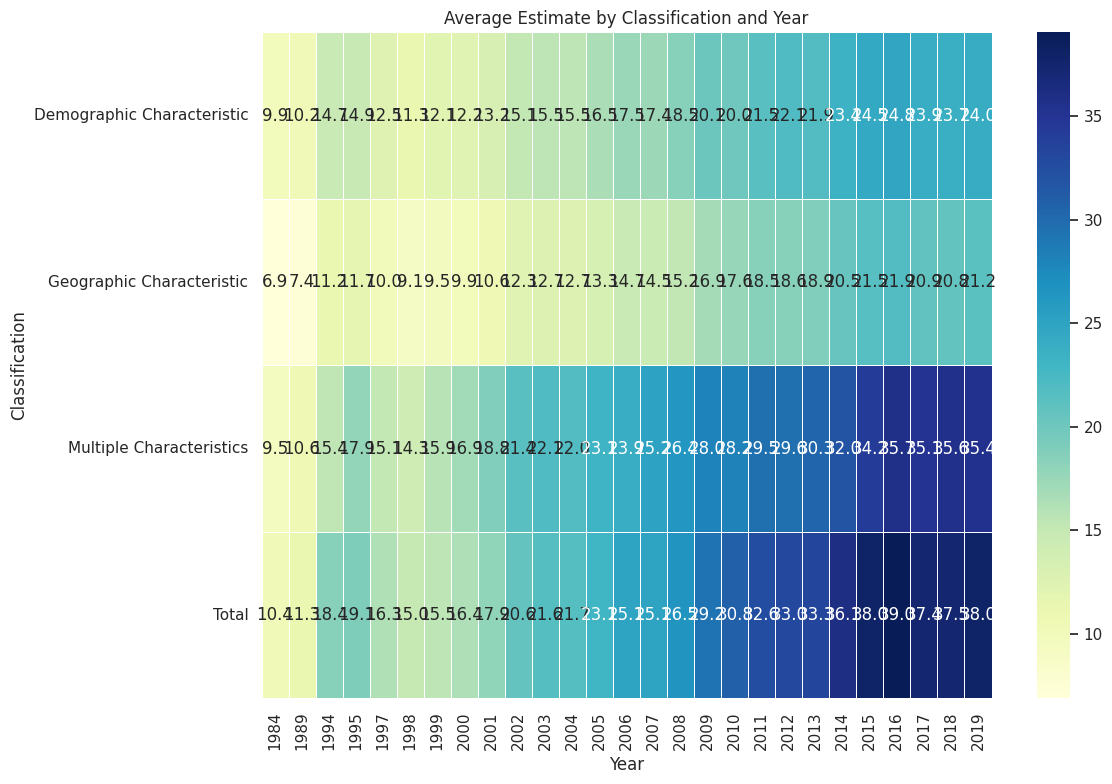

In [ ]:
heat_df = df.pivot_table(index='CLASSIFICATION', columns='TIME_PERIOD', values='ESTIMATE', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(heat_df, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Estimate by Classification and Year')
plt.ylabel('Classification')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

Custom Grouped Summary Table

In [76]:
summary = df.groupby(['TIME_PERIOD', 'SUBGROUP'])['ESTIMATE'].agg(['mean', 'min', 'max', 'count']).reset_index()
summary.head()


,TIME_PERIOD,SUBGROUP,mean,min,max,count
0,1984,18-24 years,6.4,6.4,6.4,1
1,1984,18-44 years,5.1,5.1,5.1,1
2,1984,18-64 years,4.5,4.5,4.5,1
3,1984,18-64 years: 100% to <134% FPL,7.6,7.6,7.6,1
4,1984,18-64 years: 100% to <200% FPL,4.5,4.5,4.5,1


Quantity Ordered

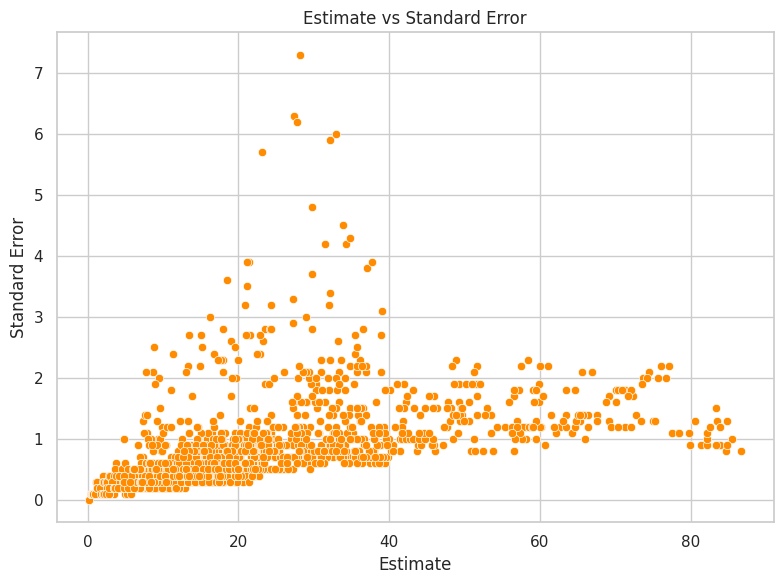

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ESTIMATE', y='STANDARD_ERROR', data=df, color='darkorange')
plt.title('Estimate vs Standard Error')
plt.xlabel('Estimate')
plt.ylabel('Standard Error')
plt.grid(True)
plt.tight_layout()
plt.show()


 Descriptive Statistics

Summary Statistics:
       SUBTOPIC  SUBTOPIC_ID  CLASSIFICATION_ID     GROUP_ID  GROUP_ORDER  \
count       0.0          0.0        1944.000000  1944.000000  1944.000000   
mean        NaN          NaN           2.722222     4.452160     5.128086   
std         NaN          NaN           1.952867     2.387085     3.046315   
min         NaN          NaN           0.000000     0.000000     0.000000   
25%         NaN          NaN           1.000000     2.750000     2.000000   
50%         NaN          NaN           1.500000     5.000000     5.500000   
75%         NaN          NaN           5.000000     6.000000     8.000000   
max         NaN          NaN           5.000000    10.000000    10.000000   

       SUBGROUP_ID  SUBGROUP_ORDER  ESTIMATE_TYPE_ID  TIME_PERIOD  \
count  1944.000000     1944.000000       1944.000000  1944.000000   
mean      4.715105       34.532407          1.013889  2005.407407   
std       2.383406       20.796615          0.117060     8.889478   
min       

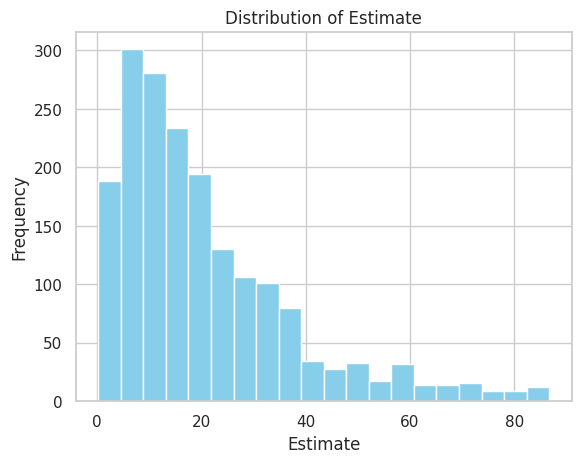

In [86]:
summary_stats = df.describe()
print(f"Summary Statistics:\n{summary_stats}")

import matplotlib.pyplot as plt
df['ESTIMATE'].hist(bins=20, color='skyblue')
plt.title('Distribution of Estimate')
plt.xlabel('Estimate')
plt.ylabel('Frequency')
plt.show()


Bar Chart

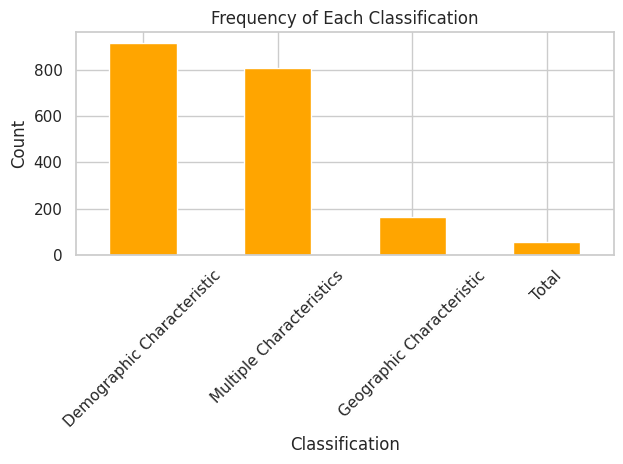

In [87]:
# Count the frequency of each CLASSIFICATION
classification_counts = df['CLASSIFICATION'].value_counts()

# Plot a bar chart
classification_counts.plot(kind='bar', color='orange')
plt.title('Frequency of Each Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pairplot

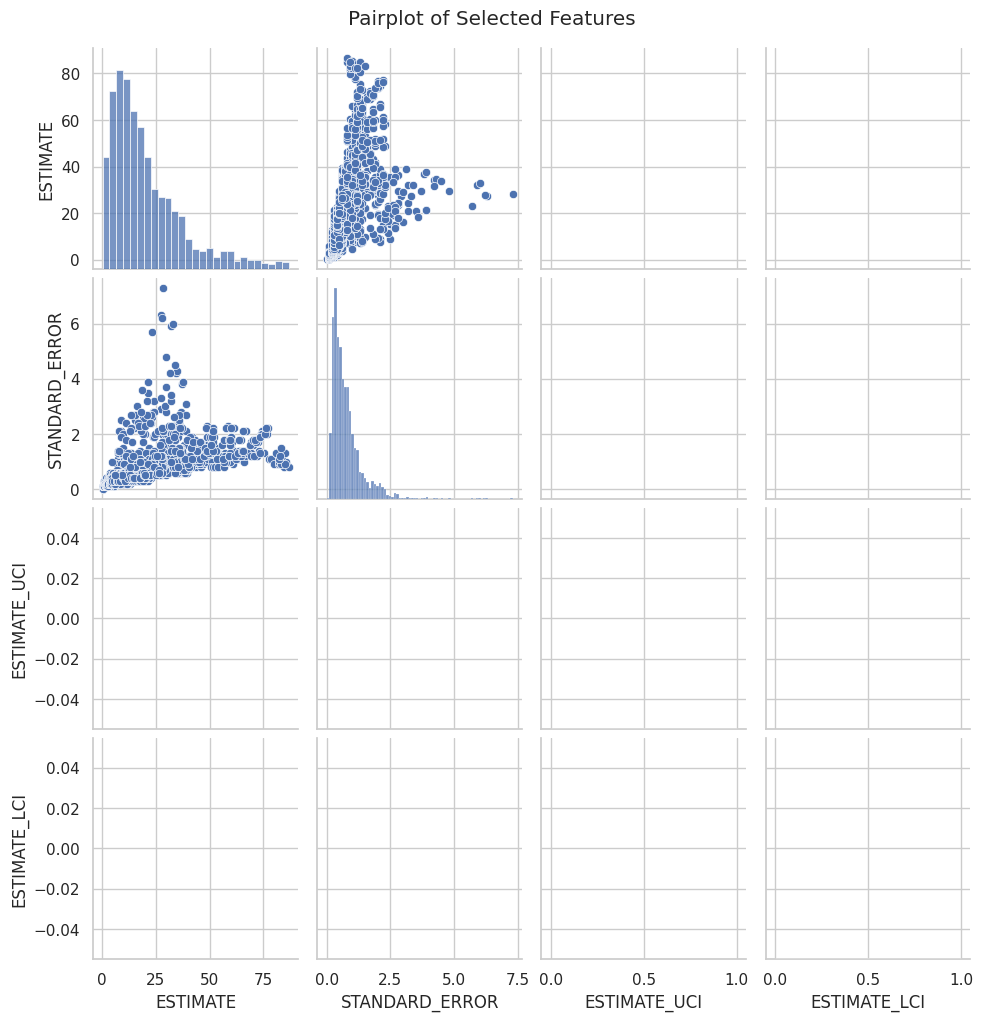

In [93]:
sns.pairplot(df[['ESTIMATE', 'STANDARD_ERROR', 'ESTIMATE_UCI', 'ESTIMATE_LCI']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


Convert TIME PERIOD to date time format

In [100]:
df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], errors='coerce')
time_series_data = df.groupby('TIME_PERIOD')['ESTIMATE'].mean()
print(time_series_data.head())


TIME_PERIOD
1970-01-01 00:00:00.000001984     9.418750
1970-01-01 00:00:00.000001989    10.159091
1970-01-01 00:00:00.000001994    14.795455
1970-01-01 00:00:00.000001995    16.040625
1970-01-01 00:00:00.000001997    13.581818
Name: ESTIMATE, dtype: float64


 Focus on One Group